# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


In [4]:
lats

array([  6.43801201, -28.6842389 ,  16.03292449, ...,  62.70268646,
         4.96646703,   1.46654509])

In [4]:
cities

['nova sintra',
 'nemuro',
 'bredasdorp',
 'adamstown',
 'edinburgh of the seven seas',
 'albany',
 'port elizabeth',
 'sittwe',
 'antsohihy',
 'vadso',
 'larroque',
 'san pedro pochutla',
 'chonchi',
 'port-aux-francais',
 'saint-francois',
 'petropavlovsk-kamchatsky',
 'conceicao da barra',
 'puerto natales',
 'grytviken',
 'hawaiian paradise park',
 'nadym',
 'coyhaique',
 'bethel',
 'fort bragg',
 'broome',
 'voi',
 'blackmans bay',
 'waitangi',
 'wailua homesteads',
 'carnarvon',
 'machali',
 'al hudaydah',
 'iqaluit',
 'susuman',
 'nova vicosa',
 'constantia',
 'kant',
 'utrik',
 'neral',
 'puerto ayora',
 'pocone',
 'miasskoye',
 'cerritos',
 'mejit',
 'kerikeri',
 'port lincoln',
 'xilin hot',
 'kannur',
 'longyearbyen',
 'portland',
 'malanje',
 'ushuaia',
 'yellowknife',
 'taiohae',
 'ulsteinvik',
 'whitehorse',
 'qaqortoq',
 'newman',
 'yelizovo',
 'olinda',
 'santa elena de uairen',
 'tazovsky',
 'kibakwe',
 'chibougamau',
 'papatowai',
 'college',
 'pamekasan',
 'golfito',

In [5]:
#city_name = "chicago" #
cities[2]

'bredasdorp'

In [3]:
cities[0:9]

['tomatlan',
 'luderitz',
 'hermanus',
 'hithadhoo',
 'petropavlovsk-kamchatsky',
 'iqaluit',
 'aykhal',
 'puerto natales',
 'utrik']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#https://api.openweathermap.org/data/2.5/weather? q={city name}&appid={API key}

# Build partial query URL
#query_url = f"{url}appid={weather_api_key}&units={units}&q="


#city_name_encoded = cities[2].replace(" ", "%20")

#query_url = f"{url}q={city_name_encoded}&appid={weather_api_key}"

In [14]:
#print(query_url)

http://api.openweathermap.org/data/2.5/weather?q=susuman&appid=96d216149e923bcf104841d742030d37


In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
 # Print the response object to the console
#print(requests.get(url_test))

Beginning Data Retrieval     
-----------------------------


In [22]:
city_name_test = cities[2].replace(" ", "%20")
city_url_test = f"{url}q={city_name_test}&units={units}&appid={weather_api_key}"
print(city_url_test)

http://api.openweathermap.org/data/2.5/weather?q=manggar&units=metric&appid=96d216149e923bcf104841d742030d37


In [23]:
city_response_test = requests.get(city_url_test).json()

In [24]:
print(json.dumps(city_response_test, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -2.8833,
        "lon": 108.2667
    },
    "dt": 1687441215,
    "id": 1636426,
    "main": {
        "feels_like": 31.18,
        "grnd_level": 1010,
        "humidity": 75,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 27.92,
        "temp_max": 27.92,
        "temp_min": 27.92
    },
    "name": "Manggar",
    "sys": {
        "country": "ID",
        "sunrise": 1687387808,
        "sunset": 1687430842
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 138,
        "gust": 6.8,
        "speed": 4.69
    }
}


In [25]:
city_response_test["wind"]["speed"]

4.69

In [26]:
city_response_test["clouds"]["all"]

0

In [27]:
city_response_test["main"]["temp_max"] 

27.92

In [5]:
# Create counters
record_count = 1
set_count = 1

######## For testing purpose
#cities = cities[0:9]



# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_name_encoded = city.replace(" ", "%20")
    city_url = f"{url}q={city_name_encoded}&units={units}&appid={weather_api_key}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:                
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url).json()
        
        city_weather = city_response["weather"] # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_response["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_response["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_response["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_response["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_response["wind"]["speed"] # YOUR CODE HERE
        city_country = city_response["sys"]["country"] # YOUR CODE HERE
        city_date = city_response["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | amungan
Processing Record 4 of Set 1 | brak
Processing Record 5 of Set 1 | port douglas
Processing Record 6 of Set 1 | itaituba
Processing Record 7 of Set 1 | sinabang
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | leua
Processing Record 12 of Set 1 | hell-ville
Processing Record 13 of Set 1 | eldorado
Processing Record 14 of Set 1 | cadale
Processing Record 15 of Set 1 | badger
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | 'izbat al burj
City not found. Skipping...
Processing Record 19 of Set 1 | altai
Processing Record 20 of Set 1 | regina
Processing Record 21 of Set 1 | sao joao da barra
Processing Record 22 of Set 1 | klyuchi
Processing Record 23 of Set 1 | ahmadpur east
Processing Record 24 of Set

Processing Record 44 of Set 4 | ulladulla
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | port mathurin
Processing Record 47 of Set 4 | sakaiminato
Processing Record 48 of Set 4 | tsiolkovskiy
City not found. Skipping...
Processing Record 49 of Set 4 | devinuwara
City not found. Skipping...
Processing Record 0 of Set 5 | elverum
Processing Record 1 of Set 5 | chinde
Processing Record 2 of Set 5 | misratah
Processing Record 3 of Set 5 | taltal
Processing Record 4 of Set 5 | kyzylorda
Processing Record 5 of Set 5 | jalgaon jamod
Processing Record 6 of Set 5 | saynshand
Processing Record 7 of Set 5 | kapa'a
Processing Record 8 of Set 5 | east end
Processing Record 9 of Set 5 | college
Processing Record 10 of Set 5 | san patricio
Processing Record 11 of Set 5 | rio grande
Processing Record 12 of Set 5 | gilgit
Processing Record 13 of Set 5 | karagandy
Processing Record 14 of Set 5 | port saint john's
Processing Record 15 of Set 5 | ocumare del tuy
Processing Recor

Processing Record 34 of Set 8 | tobruk
Processing Record 35 of Set 8 | jutai
Processing Record 36 of Set 8 | tanjungbalai
Processing Record 37 of Set 8 | emure-ekiti
Processing Record 38 of Set 8 | el idrissia
Processing Record 39 of Set 8 | fredericton
Processing Record 40 of Set 8 | yung shue wan
Processing Record 41 of Set 8 | eirunepe
Processing Record 42 of Set 8 | road town
Processing Record 43 of Set 8 | geraldton
Processing Record 44 of Set 8 | sapatgram
Processing Record 45 of Set 8 | georgetown
Processing Record 46 of Set 8 | shizunai-furukawacho
Processing Record 47 of Set 8 | marudi
City not found. Skipping...
Processing Record 48 of Set 8 | dryden
Processing Record 49 of Set 8 | island harbour
Processing Record 0 of Set 9 | sokcho
Processing Record 1 of Set 9 | qaqortoq
Processing Record 2 of Set 9 | pirallahi
Processing Record 3 of Set 9 | kiunga
Processing Record 4 of Set 9 | hotan
Processing Record 5 of Set 9 | kalynivka
Processing Record 6 of Set 9 | portland
Processin

Processing Record 27 of Set 12 | machali
Processing Record 28 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 29 of Set 12 | mahalapye
Processing Record 30 of Set 12 | ariquemes
Processing Record 31 of Set 12 | soio
Processing Record 32 of Set 12 | bhopalwala
Processing Record 33 of Set 12 | tyup
Processing Record 34 of Set 12 | anamosa
Processing Record 35 of Set 12 | rabo de peixe
Processing Record 36 of Set 12 | zapolyarnyy
Processing Record 37 of Set 12 | asyqata
Processing Record 38 of Set 12 | coahuayana de hidalgo
Processing Record 39 of Set 12 | aykhal
Processing Record 40 of Set 12 | arkalyk
Processing Record 41 of Set 12 | revelstoke
Processing Record 42 of Set 12 | zell am see
Processing Record 43 of Set 12 | tefe
Processing Record 44 of Set 12 | cafayate
Processing Record 45 of Set 12 | haenam
Processing Record 46 of Set 12 | kokopo
Processing Record 47 of Set 12 | bereznik
-----------------------------
Data Retrieval Complete      
-----------------

In [6]:
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,0.79,84,100,3.09,GL,1687449415
1,invercargill,-46.4000,168.3500,8.16,94,94,1.43,NZ,1687448993
2,amungan,15.3652,119.9582,27.10,80,93,1.45,PH,1687449415
3,brak,27.5496,14.2714,35.09,12,0,5.74,LY,1687449415
4,port douglas,-16.4833,145.4667,22.47,82,99,4.15,AU,1687449415


In [3]:
# Set the API base URL
url = "https://openweathermap.org/api" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_test.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_test.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,0.79,84,100,3.09,GL,1687449415
1,invercargill,-46.4000,168.3500,8.16,94,94,1.43,NZ,1687448993
2,amungan,15.3652,119.9582,27.10,80,93,1.45,PH,1687449415
3,brak,27.5496,14.2714,35.09,12,0,5.74,LY,1687449415
4,port douglas,-16.4833,145.4667,22.47,82,99,4.15,AU,1687449415


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

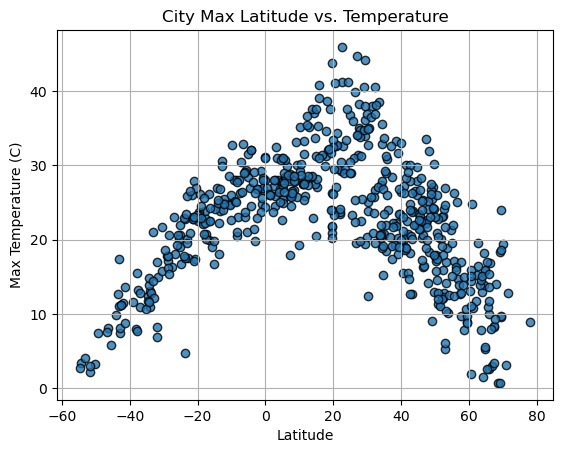

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black', alpha=0.8)
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

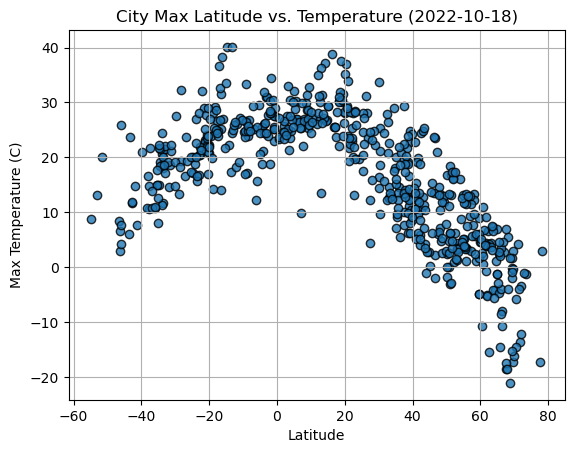

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

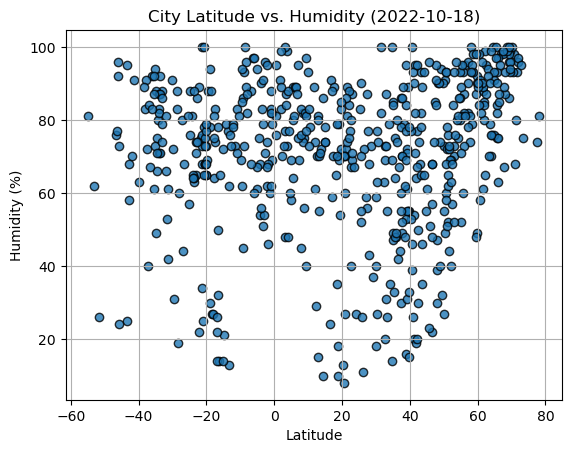

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

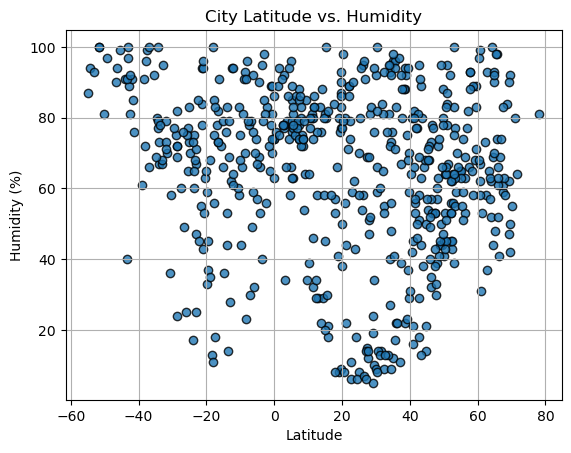

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black', alpha=0.8)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#### Latitude Vs. Cloudiness

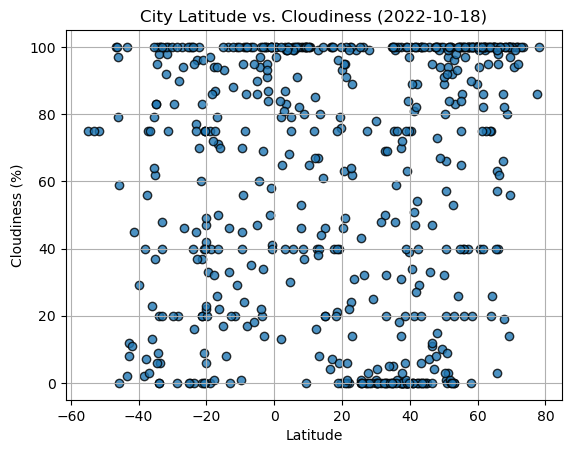

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

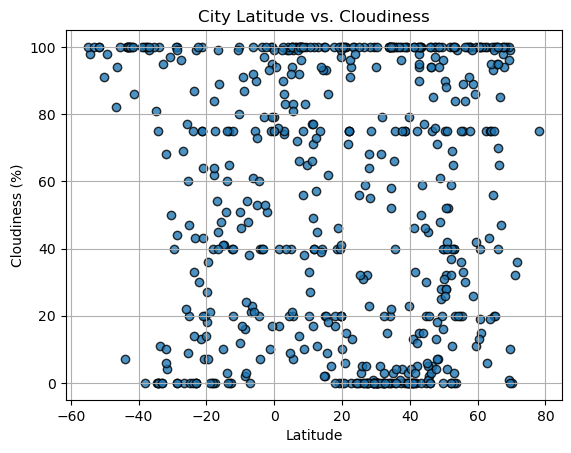

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black', alpha=0.8)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

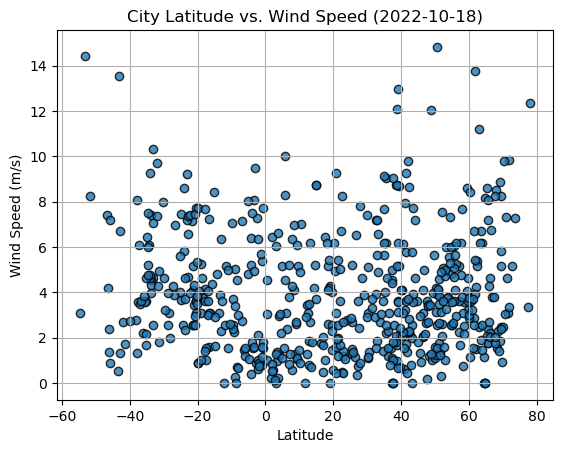

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

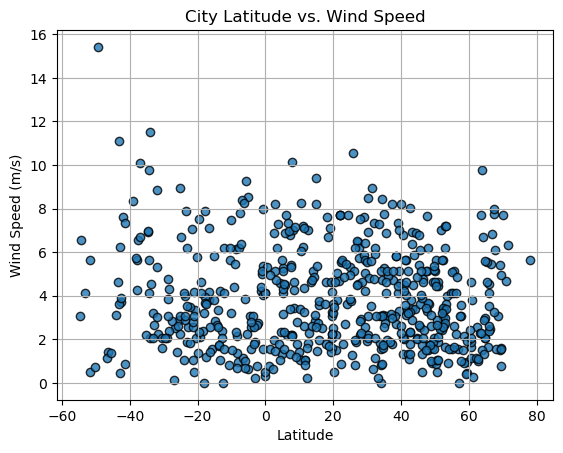

In [13]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black', alpha=0.8)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_lin_regress_plot(x_data, y_data, x_label, y_label, hemisphere_label):
    # 1. Do the linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    
    # 2. Obtain the linear regression predicted values
    regress_values = x_data * slope + intercept
    
    # 3. Assemble the line euqation as a string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # 4. Plot the scatter plot
    plt.scatter(x_data, y_data, s = 35,  marker="o") #, alpha=0.9) # color = "blue",
    
    # 5. Plot the regression line    
    plt.plot(x_data, regress_values, "r-") #, label="2018")
    
    # 6. Plot the annotation
    #plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    x_offset = 0
    y_offset = 0
    
    if (slope >= -1 and slope <= 0):
        x_offset = min(x_data)
        y_offset = min(y_data)+5
    elif (slope > 0 and slope < 1) :
        x_offset = min(x_data)
        y_offset = max(y_data)-5
    
    plt.annotate(line_eq,(x_offset, y_offset), fontsize=15,color="red")
    
    # 7. Plot the labels
    plt.title(f"{hemisphere_label}: {y_label} vs. {x_label}")
    plt.xlabel(f"{x_label}", fontsize = 10)
    plt.ylabel(f"{y_label}", fontsize = 10)
    #plt.xticks(fontsize=14)
    #plt.yticks(fontsize=14)
    #plt.legend(loc="upper right")
    print(f"The r-value is: {r_value**2}")
    plt.show()

In [14]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,0.79,84,100,3.09,GL,1687449415
2,amungan,15.3652,119.9582,27.10,80,93,1.45,PH,1687449415
3,brak,27.5496,14.2714,35.09,12,0,5.74,LY,1687449415
6,sinabang,2.4803,96.3801,27.24,78,90,1.95,ID,1687449416
8,lompoc,34.6391,-120.4579,15.29,76,100,3.13,US,1687449417


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


In [31]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,8.16,94,94,1.43,NZ,1687448993
4,port douglas,-16.4833,145.4667,22.47,82,99,4.15,AU,1687449415
5,itaituba,-4.2761,-55.9836,32.09,66,40,2.57,BR,1687449416
7,hithadhoo,-0.6000,73.0833,26.68,81,100,5.36,MV,1687449417
9,grytviken,-54.2811,-36.5092,3.41,94,98,6.57,GS,1687449417


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


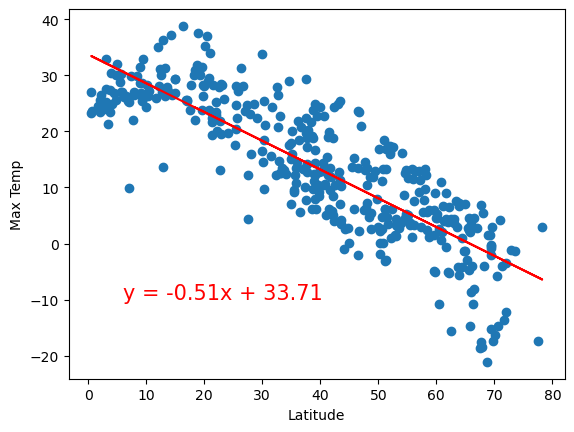

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4568965065817056


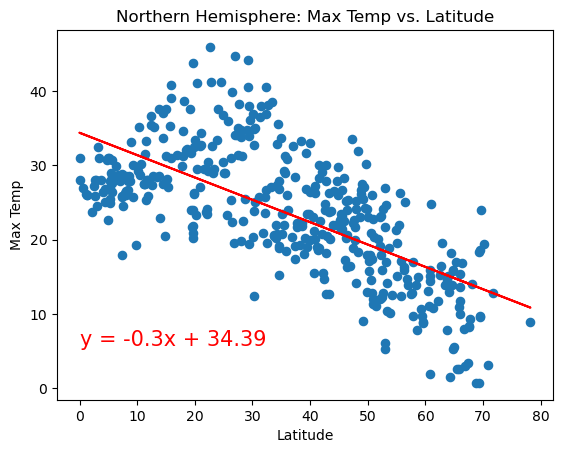

In [60]:
create_lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude","Max Temp", "Northern Hemisphere") 

The r-value is: 0.4121057168607245


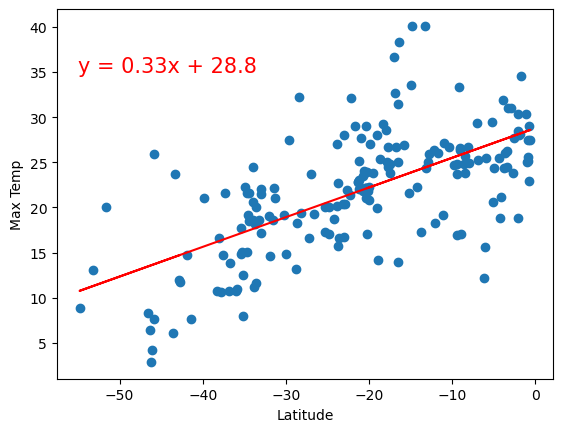

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.7713426802915948


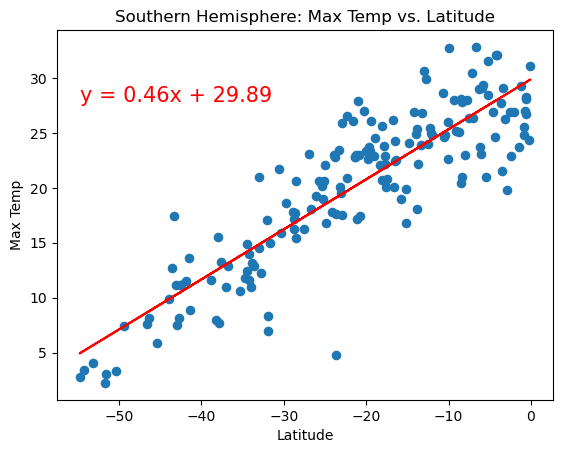

In [61]:
create_lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude","Max Temp", "Southern Hemisphere") 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0007109181229489761


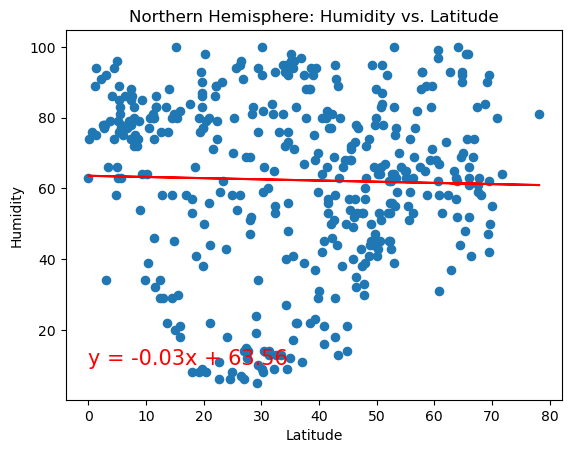

In [62]:
create_lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude","Humidity", "Northern Hemisphere") 

The r-value is: 0.05689741545789598


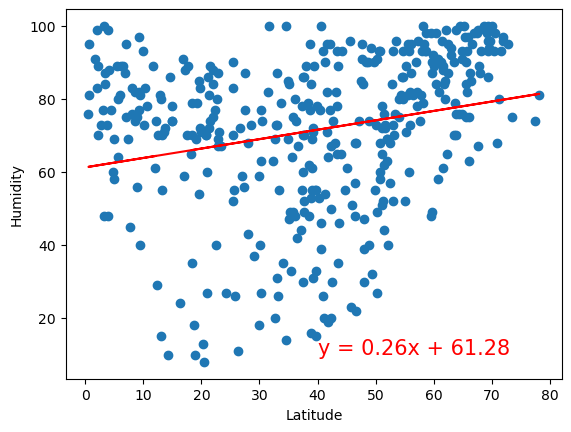

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


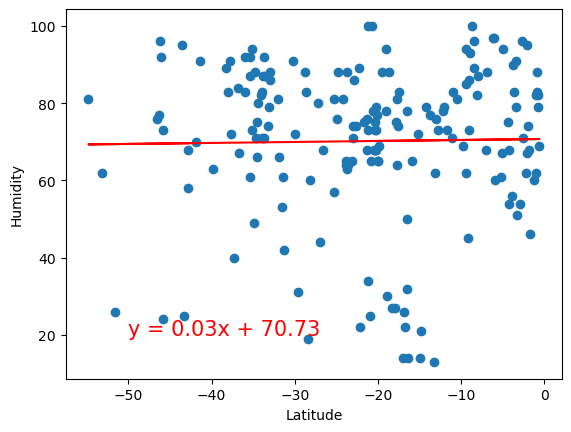

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.056167132866817814


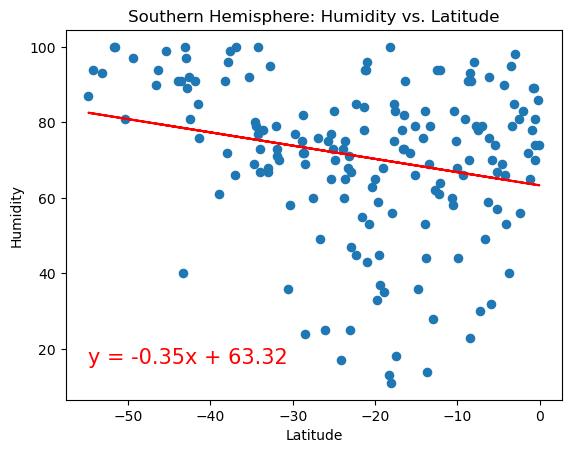

In [63]:
create_lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude","Humidity", "Southern Hemisphere") 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00023581299656558313


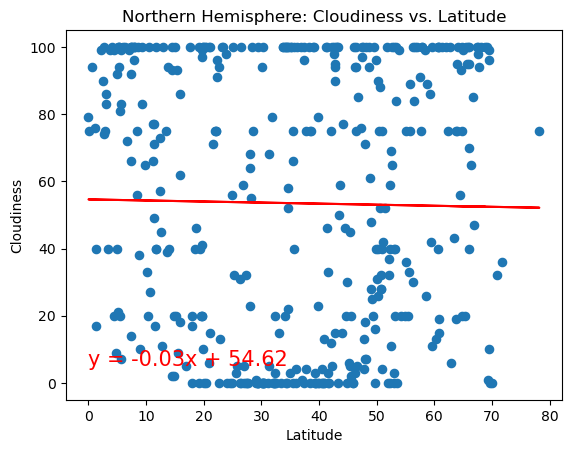

In [64]:
create_lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude","Cloudiness", "Northern Hemisphere") 

The r-value is: 0.024026517125811015


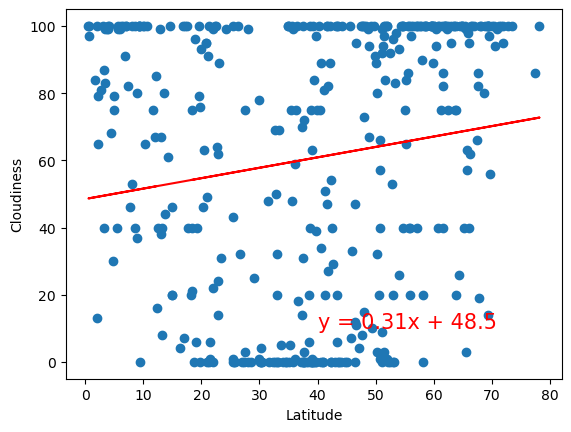

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


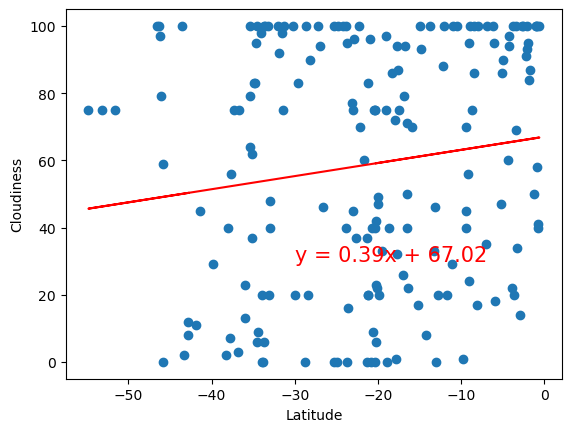

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.045572939740739206


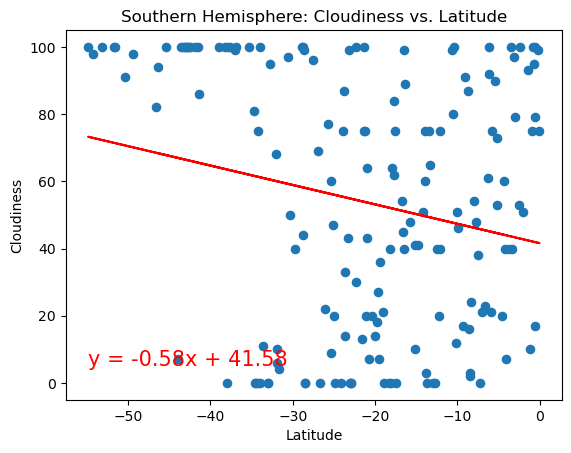

In [65]:
create_lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude","Cloudiness", "Southern Hemisphere") 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012847814871926091


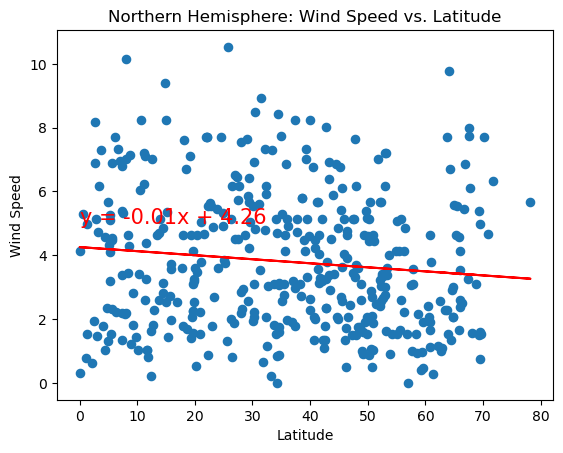

In [66]:
create_lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude","Wind Speed", "Northern Hemisphere") 

The r-value is: 0.030396762354449467


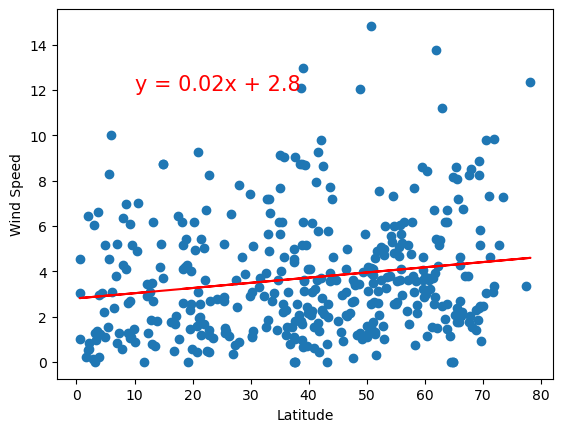

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


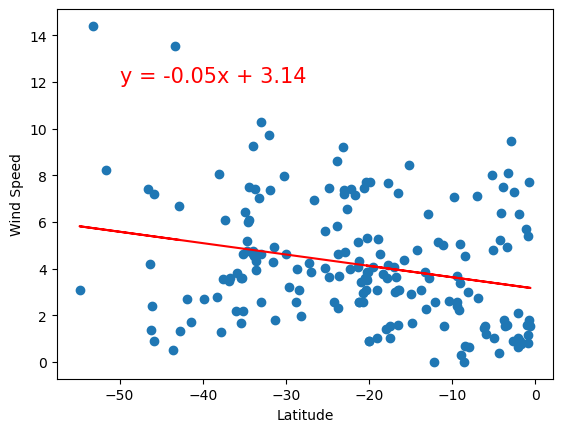

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.030999959414258486


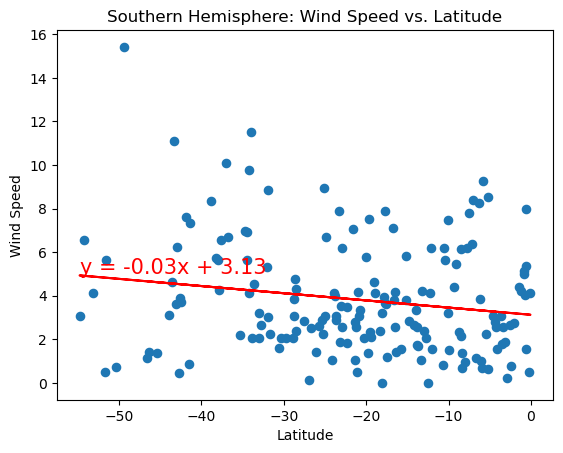

In [67]:
create_lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude","Wind Speed", "Southern Hemisphere") 

**Discussion about the linear relationship:** YOUR RESPONSE HERE